In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
Image('graph.png')

We are going to use networkx package to construct the graph and find the shortest paths. Refer to the [NetworkX documentation](https://networkx.github.io/documentation/stable/).

In [3]:
#type in the edges and edgecost as a list of 3-tuples
edges = [(0,1,2),(0,2, 1.5),(0,3, 2.5),(1,4, 1.5),(2,5, 0.5),(4,8, 1),
         (2,6, 2.5),(3,7, 2),(7,9, 1.25),(5,10, 2.75),(6,10, 3.25),
         (9,10, 1.5),(8,10, 3.5)]

#Define an empty graph
G = nx.DiGraph()
G.add_nodes_from(range(11))

#populate the edges and the cost in graph G

G.add_weighted_edges_from(edges)
#Find the shortest path from Node 0 to Node 10
nx.shortest_path(G, 0, 10)
#Find the cost of the shortest path from Node 0 to Node 10


[0, 2, 5, 10]

Let us now move onto a grid which represents the robot's operating environment. First convert the grid to a graph.  Then we will use Astar from networkX to find the shortest path

In [4]:
# write the Euclidean function that takes in the
# node x, y and compute the distance
def euclidean(node1, node2):
    #write code here
    x1,y1 = node1
    x2,y2 = node2
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

[[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


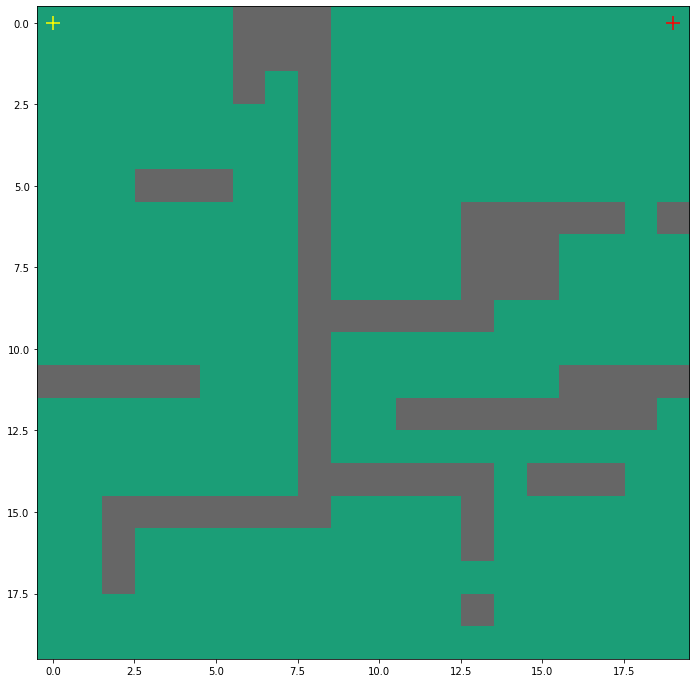

In [5]:
# use np.load to load a grid of 1s and 0s
# 1 - occupied 0- free
grid = np.load("astar_grid.npy")
nodes = grid.shape
print(grid)
# you can define your own start/ end
start = (0, 0)
goal = (0, 19)

# visualize the start/ end and the robot's environment
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.show()

Convert this grid array into a graph. You have to follow these steps
1. Find the dimensions of grid. Use grid_2d_graph() to initialize a grid graph of corresponding dimensions
2. Use remove_node() to remove nodes and edges of all cells that are occupied

In [6]:
#initialize graph
G = nx.grid_2d_graph(nodes[0],nodes[1])

deleted_nodes = 0 # counter to keep track of deleted nodes
#loop to remove nodes
for i in range(nodes[0]):
    for j in range(nodes[1]):
        if grid[i,j]==1:
            G.remove_node((i,j))
            deleted_nodes+=1
print(f"removed {deleted_nodes} nodes")
print(f"number of occupied cells in grid {np.sum(grid)}")

removed 77 nodes
number of occupied cells in grid 77


Visualize the resulting graph using nx.draw(). Note that pos argument for nx.draw() has been given below. The graph is too dense. Try changing the node_size and node_color. You can correlate this graph with the grid's occupied cells

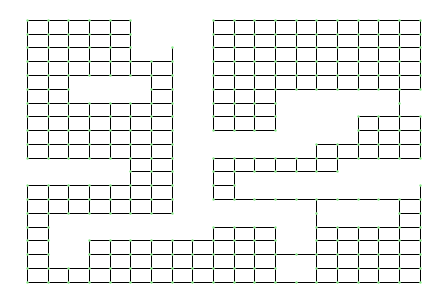

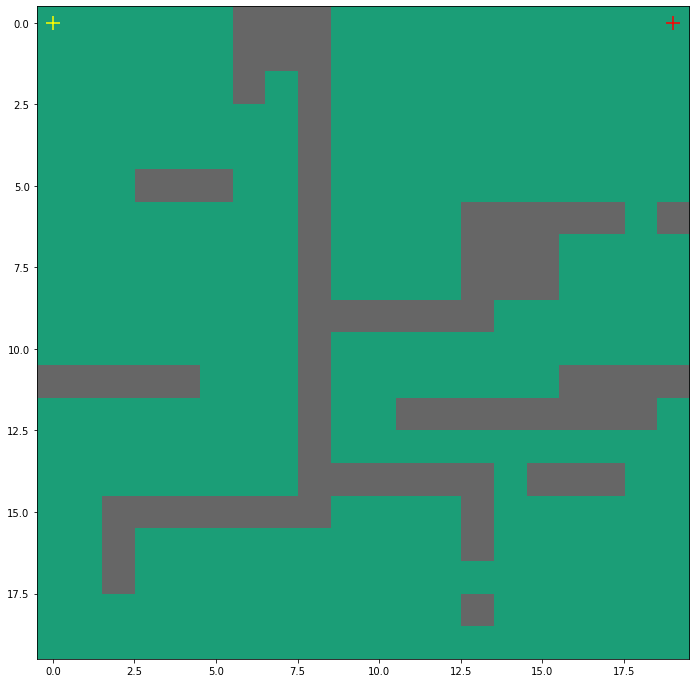

In [7]:
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, node_color='lightgreen', node_size=2)
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.show()

We are 2 more steps away from finding the path!
1. Set edge attribute.  Use set_edge_attributes(). Remember we have to provide a dictionary input: Edge is the key and cost is the value. We can set every move to a neighbor to have unit cost.
2. Use astar_path() to find the path. Set heuristic to be euclidean distance. weight to be the attribute you assigned in step 1

In [8]:
nx.set_edge_attributes(G,1,name='cost')
astar_path = nx.astar_path(G,start,goal,heuristic=euclidean,weight='cost')
# print(astar_path)

Visualize the path you have computed!

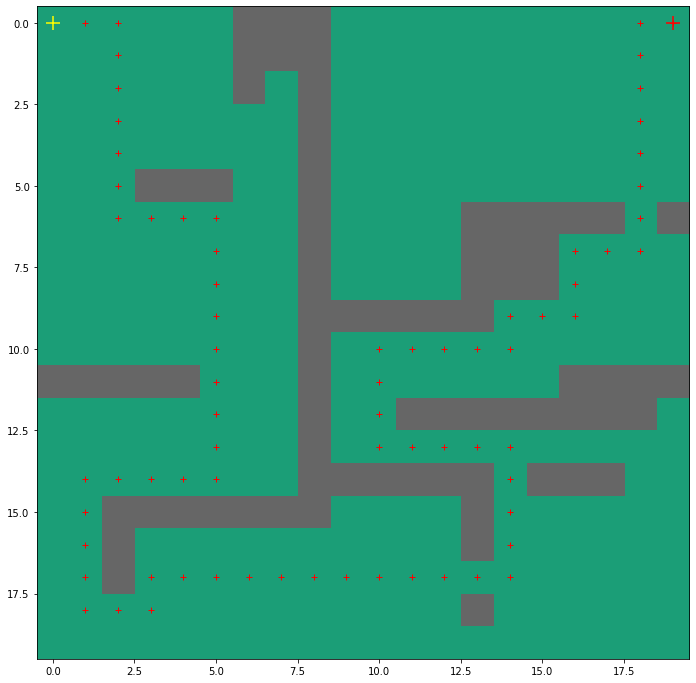

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
for s in astar_path[1:]:
  ax.plot(s[1], s[0],'r+')
#   s = e

Cool! Now you can read arbitrary evironments and find the shortest path between 2 robot positions. Pick a game environment from here and repeat: {https://www.movingai.com/benchmarks/dao/index.html}

###Thinice Map - https://movingai.com/benchmarks/sc1/index.html
(downoad from - https://drive.google.com/file/d/1y466NWSfCFIHJQNMTSqZueqXCu5p-DM-/view?usp=sharing)

In [10]:
grid = np.loadtxt("ThinIce.txt")
# print(arr)

OSError: ignored

In [ ]:
# use np.load to load a grid of 1s and 0s
# 1 - occupied 0- free
# grid = np.load("astar_grid.npy")
nodes = grid.shape
# print(nodes)
# you can define your own start/ end
start = (0, 50)
goal = (500, 700)
# print(grid[start[0],start[1]])
# print(grid[goal[0],goal[1]])
# visualize the start/ end and the robot's environment
# fig, ax = plt.subplots(figsize=(12,12))
# ax.imshow(grid, cmap=plt.cm.Dark2)
# ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
# ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
# plt.show()

In [ ]:
#initialize graph
G = nx.grid_2d_graph(nodes[0],nodes[1])

deleted_nodes = 0 # counter to keep track of deleted nodes
#loop to remove nodes
for i in range(nodes[0]):
    for j in range(nodes[1]):
        if grid[i,j]==1:
            G.remove_node((i,j))
            deleted_nodes+=1
print(f"removed {deleted_nodes} nodes")
print(f"number of occupied cells in grid {np.sum(grid)}")

In [ ]:
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, node_color='lightgreen', node_size=2)
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.show()

In [ ]:
nx.set_edge_attributes(G,1,name='cost')
astar_path = nx.astar_path(G,start,goal,heuristic=euclidean,weight='cost')
# print(astar_path)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
for s in astar_path[1:]:
  ax.plot(s[1], s[0],'r+')
#   s = e